In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(rc={"figure.figsize": (16, 9)})
sns.set(style="whitegrid")

from num2words import num2words

In [14]:
def remove_stat_columns(df):
    temp = pd.io.json.json_normalize(df['players'])
    stat_cols = [col for col in temp.columns if 'stats' in col]
    for col in stat_cols:
        temp.drop(col, 1, inplace=True)
    return temp

def add_week_col(df, week_int):
    df['week'] = num2words(week_int)
    return df

In [70]:
endpoint_base = "http://api.fantasy.nfl.com/v1/players/stats?statType=seasonStats&season=2015&statType=weekStats&week=%d&format=json"

all_data = []
for i in range(10):
    url = endpoint_base % (i+1)
    raw = pd.read_json(url)
    no_stat = remove_stat_columns(raw)
    with_week = add_week_col(no_stat, (i+1))
    all_data.append(with_week)

In [30]:
all_data[2].head()

,esbid,gsisPlayerId,id,name,position,seasonProjectedPts,seasonPts,teamAbbr,weekProjectedPts,weekPts,week
0,False,False,100029,San Francisco 49ers,DEF,123.0,64.0,SF,0,2.0,three
1,ABD688172,00-0028564,2530658,Isa Abdul-Quddus,DB,0.0,62.9,MIA,0,2.0,three
2,ABD647726,00-0032104,2552374,Ameer Abdullah,RB,178.5,92.0,DET,0,10.2,three
3,ACH678651,00-0028041,2495101,Sam Acho,LB,0.0,39.5,CHI,0,1.5,three
4,ACK184395,00-0031186,2549981,Kenneth Acker,DB,0.0,74.0,KC,0,9.5,three


In [71]:
all_weeks = pd.concat(all_data)
all_weeks['actual_vs_proj'] = all_weeks['weekPts'] - all_weeks['weekProjectedPts']
all_weeks.head()

,esbid,gsisPlayerId,id,name,position,seasonProjectedPts,seasonPts,teamAbbr,weekProjectedPts,weekPts,week,actual_vs_proj
0,False,False,100029,San Francisco 49ers,DEF,123.0,64.0,SF,0,14.0,one,14.0
1,ABD647726,00-0032104,2552374,Ameer Abdullah,RB,178.5,92.0,DET,0,15.4,one,15.4
2,ABD660476,00-0025940,729,Husain Abdullah,DB,0.0,27.5,,0,6.5,one,6.5
3,ACK184395,00-0031186,2549981,Kenneth Acker,DB,0.0,74.0,KC,0,3.5,one,3.5
4,ADA218591,00-0031381,2543495,Davante Adams,WR,113.2,56.3,GB,0,5.9,one,5.9


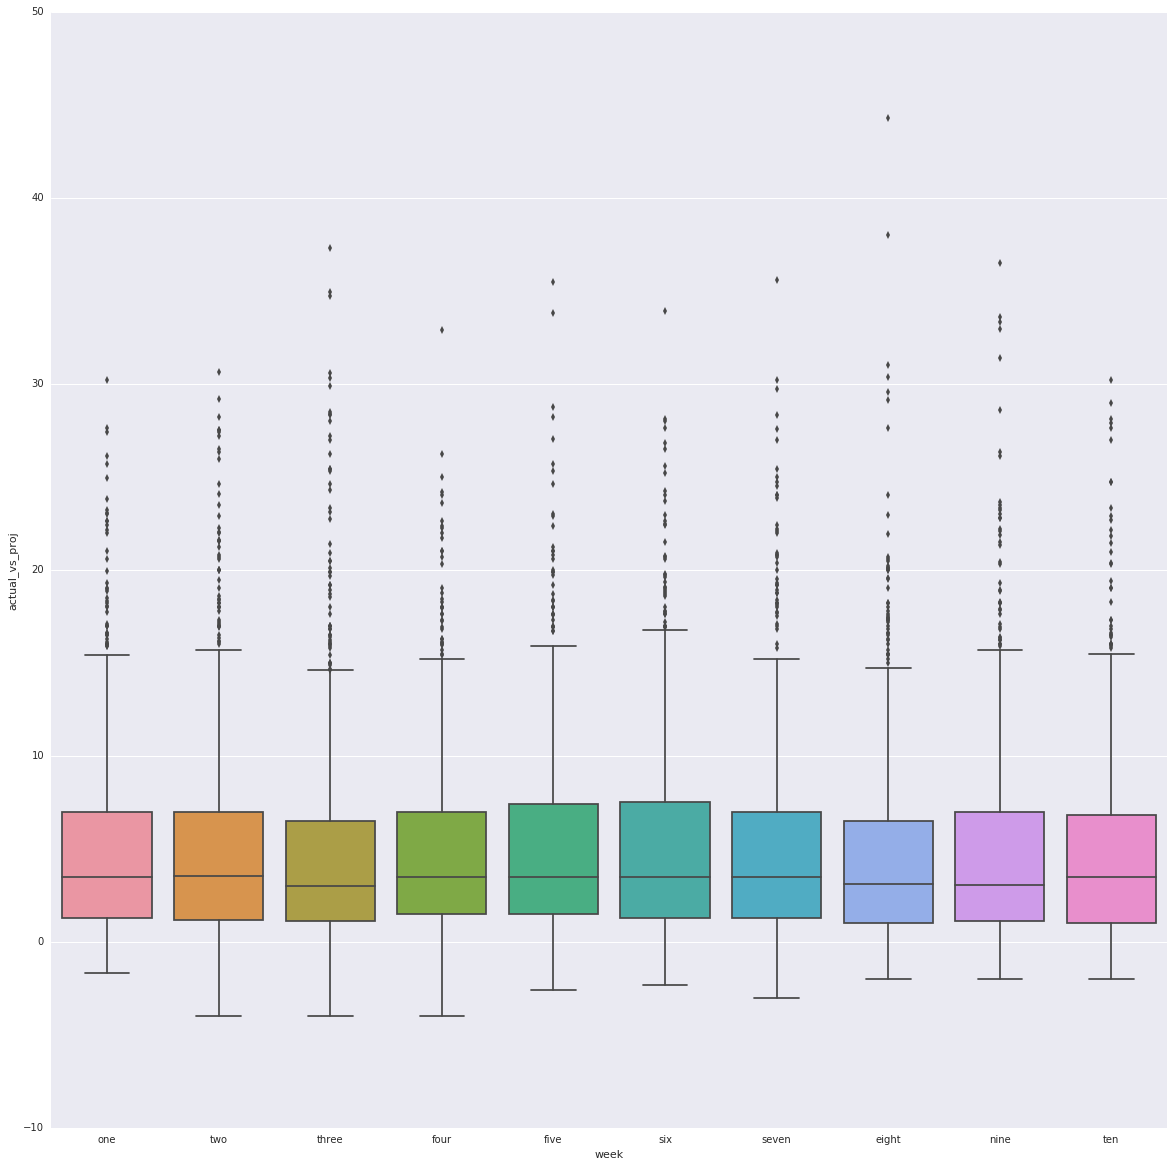

In [72]:
sns.boxplot(x='week', y='actual_vs_proj', data=all_weeks)
plt.show()

Look at player performance over time

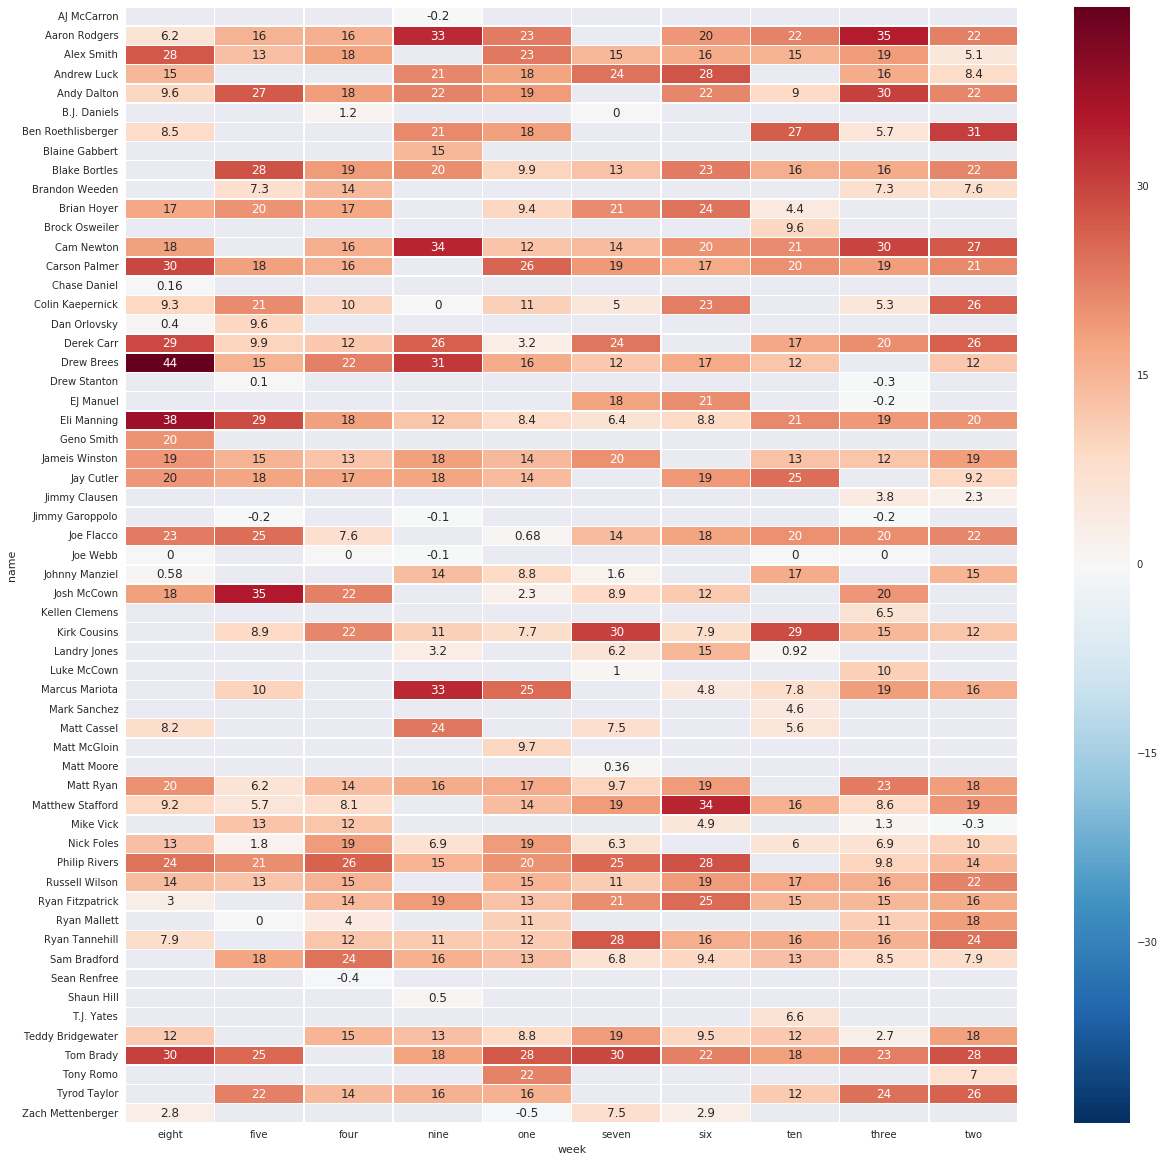

In [79]:
sns.set(rc={"figure.figsize": (20, 20)})

# NOTE: name would be a lot more useful here, but there are duplicates and that raises an error
tab = all_weeks[all_weeks['position'] == 'QB'].dropna().pivot("name", "week", "weekPts")
sns.heatmap(tab, annot=True, linewidths=.5)
plt.show()

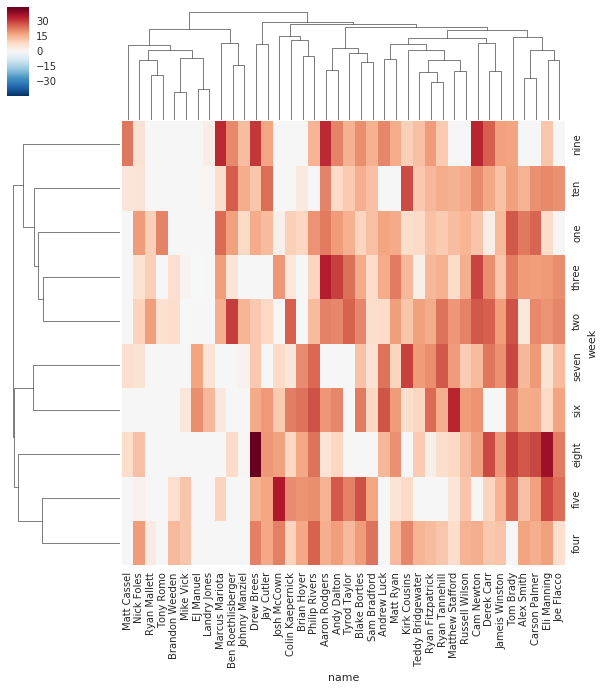

In [106]:
qb = tab
qb.fillna(0, inplace=True)
qb = qb.where(lambda x: x.transpose().sum() > 20).dropna()
sns.clustermap(qb.transpose())

In [83]:
fr = tab.transpose()
defense = pd.DataFrame({
    'sd' : fr.std(),
    'mean' : fr.mean(),
    'median' : fr.median(),
    'sum' : fr.sum(),
    'count' : fr.count(),
})

#defense['score'] = defense.apply(lambda x: x['median'] * (1 / x['sd']))
#defense.sort_values('score', ascending=False)

defense['score'] = (defense['median'] * (1 / defense['sd']))
defense.sort_values('mean', ascending=False)

,count,mean,median,sd,sum,score
name,,,,,,
Tom Brady,9,24.724444,25.30,4.681482,222.52,5.404271
Aaron Rodgers,9,21.433333,22.12,8.775500,192.90,2.520654
Cam Newton,9,21.342222,19.76,7.375117,192.08,2.679280
Carson Palmer,9,20.617778,19.20,4.388604,185.56,4.374968
Philip Rivers,9,20.391111,20.60,6.226284,183.52,3.308555
Drew Brees,9,20.308889,16.50,10.943533,182.78,1.507740
Geno Smith,1,20.000000,20.00,NaN,20.00,NaN
Andy Dalton,9,19.802222,21.52,7.039343,178.22,3.057104
Derek Carr,9,18.704444,20.46,8.812433,168.34,2.321720


In [81]:
defense.corr()

,mean,median,sd,sum,score
mean,1.000000,0.978104,0.574025,0.879110,0.722318
median,0.978104,1.000000,0.575768,0.848552,0.718555
sd,0.574025,0.575768,1.000000,0.383623,0.091543
sum,0.879110,0.848552,0.383623,1.000000,0.700888
score,0.722318,0.718555,0.091543,0.700888,1.000000
